# Overview Results


In [1]:
from scripts.viz_utils import *
from scripts.utils import get_question_statement

data = pd.read_csv('../data/data_scales.csv', index_col='ResponseId')

scale_titles = {
    'ati': 'Affinity for Technology Interaction',
    'hcsds_c': 'Healthcare Trust - Competence',
    'hcsds_v': 'Healthcare Trust - Values',
    'tia_rc': 'TiA - Reliability/Confidence',
    'tia_up': 'TiA - Understanding/Predictability',
    'tia_f': 'TiA - Familiarity',
    'tia_pro': 'TiA - Propensity to Trust',
    'tia_t': 'TiA - Trust in Automation'
}

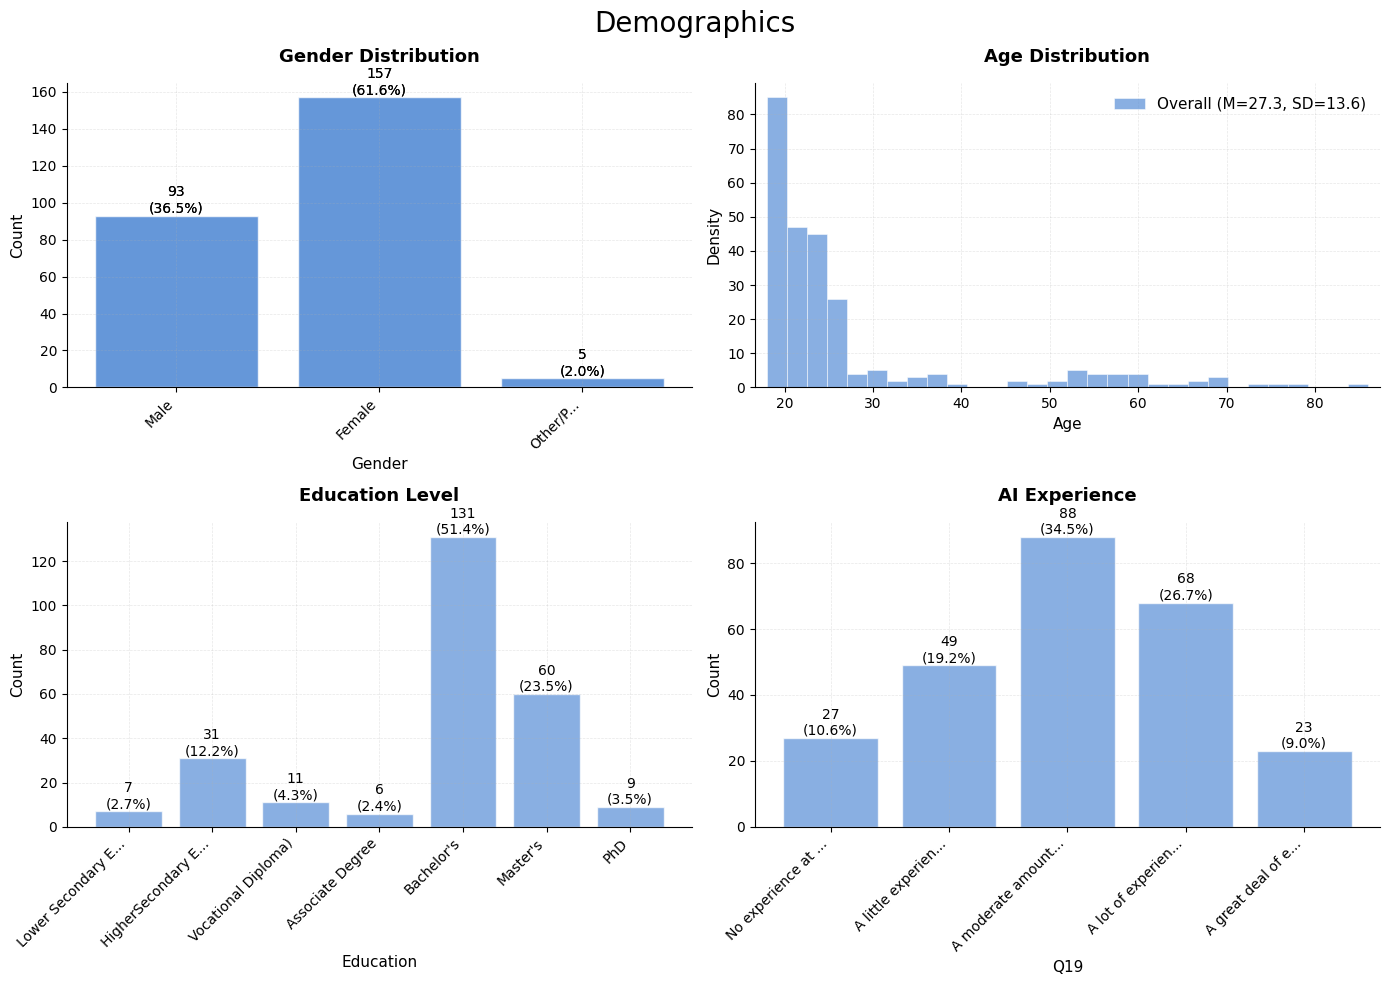

In [2]:
# Demographics
fig, axes = create_figure_grid(4, ncols=2, figsize=(14, 10))
plot_categorical_bar(data, 'gender', title='Gender Distribution', ax=axes[0], trunc=10)

plot_categorical_bar(data, 'gender', title='Gender Distribution', ax=axes[0], trunc=10)
plot_continuous_distribution(data, 'age', title='Age Distribution', ax=axes[1])
plot_categorical_bar(data, 'education', title='Education Level', ax=axes[2])
plot_categorical_bar(data, 'Q19', title='AI Experience', ax=axes[3])

fig.suptitle("Demographics", fontsize=20)

plt.tight_layout()
plt.show()

<Axes: title={'center': 'AI Experience by Gender'}, xlabel='Q19', ylabel='Count'>

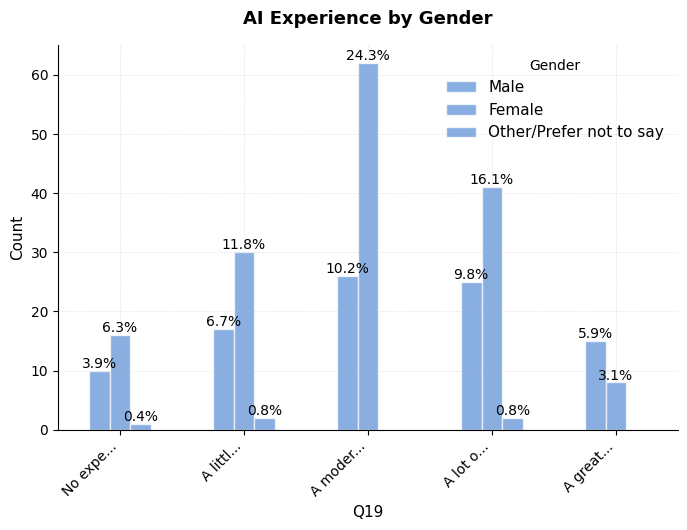

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_categorical_bar(data, 'Q19', group_by='gender', title='AI Experience by Gender', ax=ax, trunc=10, show_absolute=False)


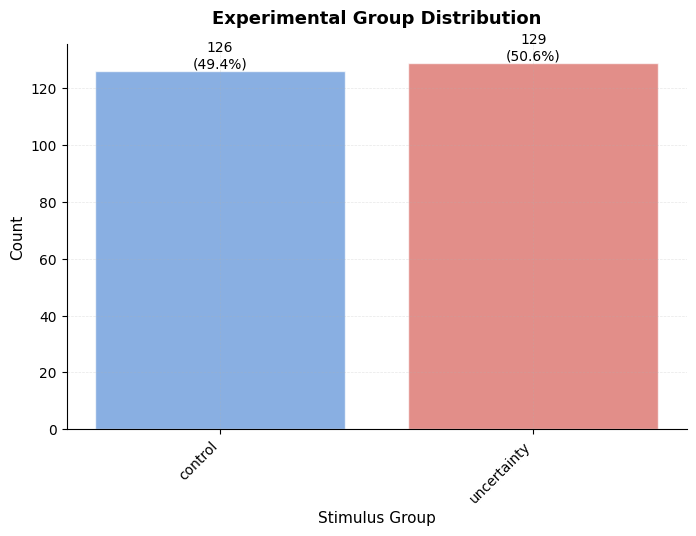

In [4]:
# distribution over experimental groups
fig, ax = plt.subplots(figsize=(8, 5))

# Get value counts for stimulus_group
counts = data['stimulus_group'].value_counts().sort_index()

# Get readable labels
from scripts.viz_utils import get_readable_labels
x_labels = get_readable_labels('stimulus_group', counts.index.tolist(), trunc=20)

# Create manual color mapping using the same colors as the grouped plots
colors = ['#578ED6', '#D65F57']  # Blue for control (0), Pink for uncertainty (1)

# Plot bars with custom colors
bars = ax.bar(range(len(counts)), counts.values, color=colors,
             alpha=0.7, edgecolor='white', linewidth=1)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Add percentage labels
for i, (bar, count) in enumerate(zip(bars, counts.values)):
    height = bar.get_height()
    percentage = count / counts.sum() * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{count:.0f}\n({percentage:.1f}%)',
           ha='center', va='bottom', fontsize=10)

# Apply styling
from scripts.viz_utils import apply_consistent_style
apply_consistent_style(ax, title='Experimental Group Distribution',
                      xlabel='Stimulus Group', ylabel='Count')

plt.show()

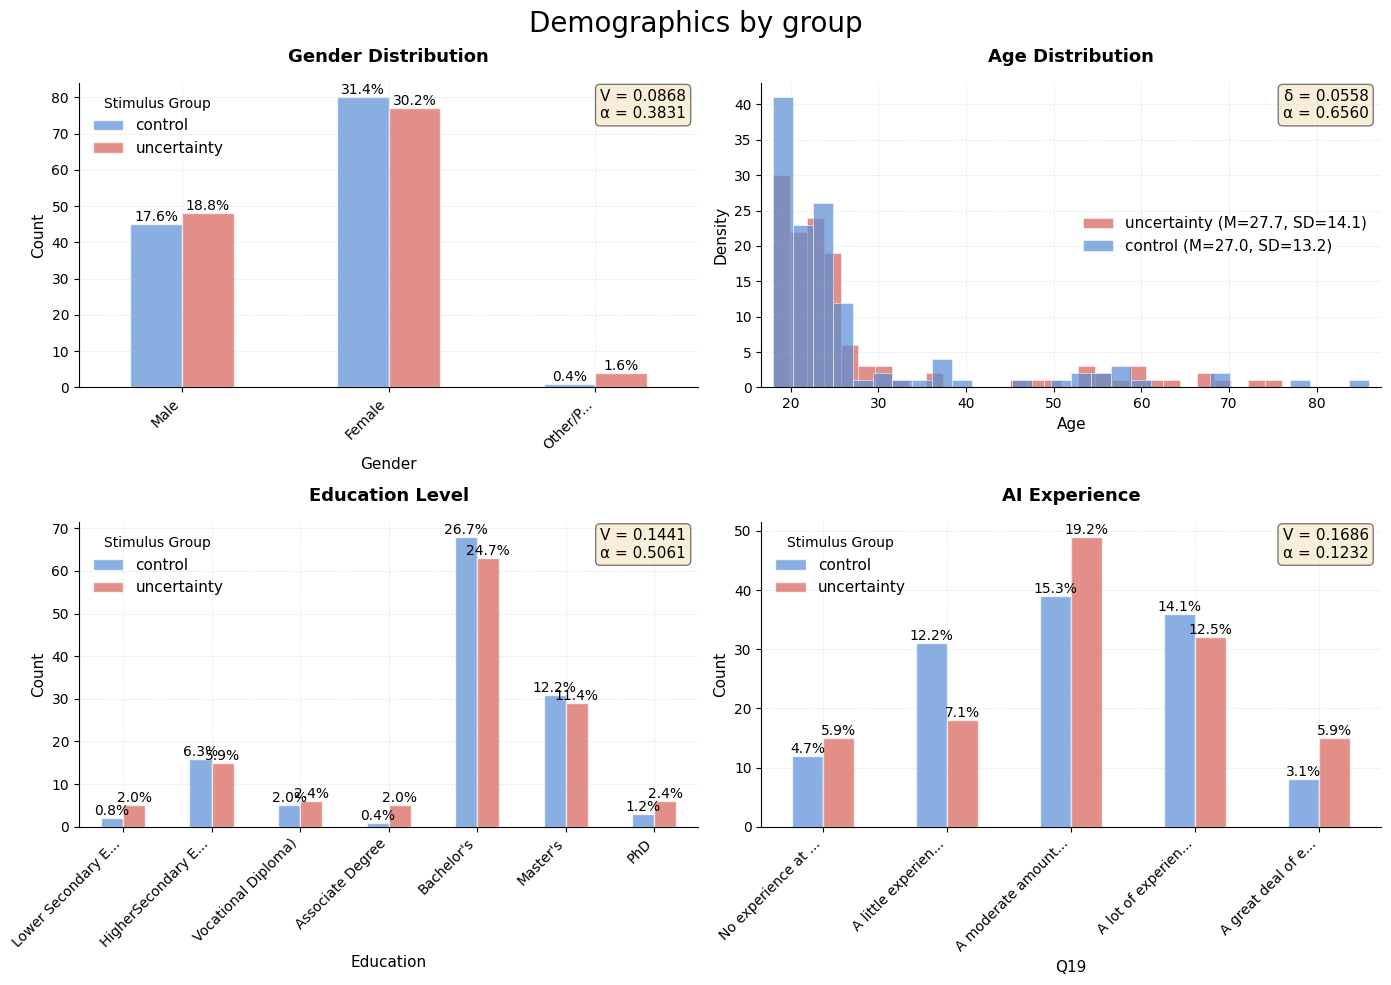

In [5]:
# Demographics per group
fig, axes = create_figure_grid(4, ncols=2, figsize=(14, 10))

plot_categorical_bar(data, 'gender', group_by='stimulus_group', title='Gender Distribution', ax=axes[0], trunc=10, show_absolute=False)
plot_continuous_distribution(data, 'age', group_by='stimulus_group', title='Age Distribution', ax=axes[1])
plot_categorical_bar(data, 'education', group_by='stimulus_group', title='Education Level', ax=axes[2], show_absolute=False)
plot_categorical_bar(data, 'Q19', group_by='stimulus_group', title='AI Experience', ax=axes[3], show_absolute=False)

fig.suptitle("Demographics by group", fontsize=20)

plt.tight_layout()
plt.show()

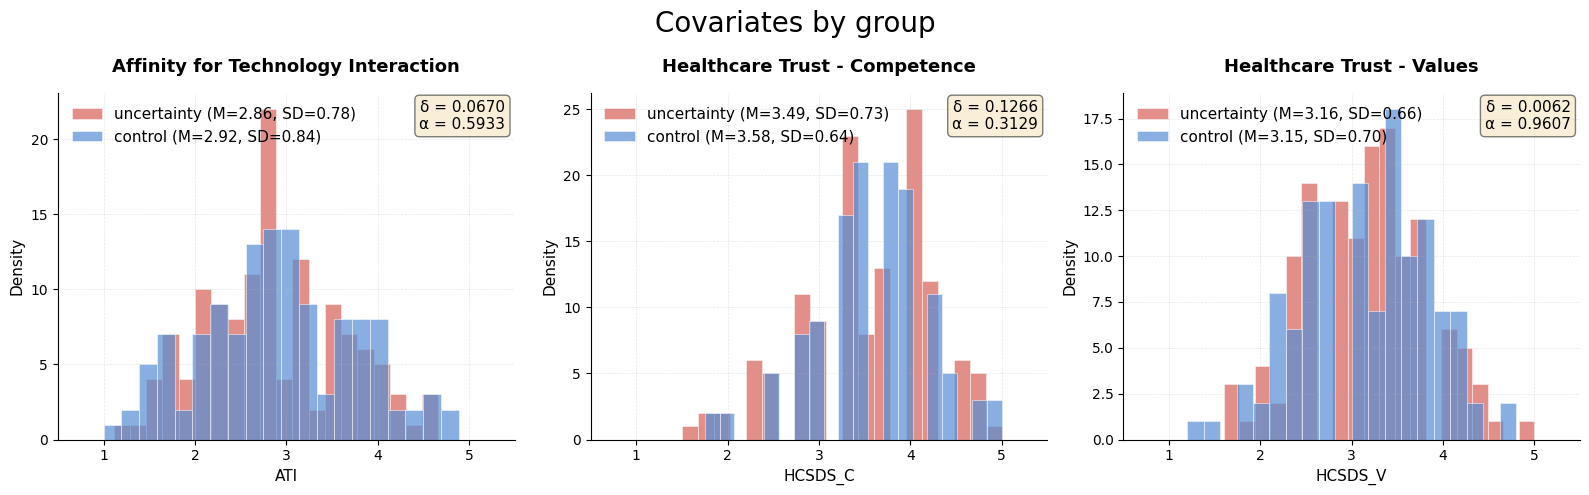

In [6]:
# Covariates
fig, axes = create_figure_grid(3, ncols=3, figsize=(16, 5))

cov_scales = ['ati', 'hcsds_c', 'hcsds_v']

for idx, scale in enumerate(cov_scales):
    plot_likert_distribution(data, scale, title=scale_titles.get(scale),
                        group_by='stimulus_group', ax=axes[idx], show_bars=True, show_kde=False)

fig.suptitle("Covariates by group", fontsize=20)

plt.tight_layout()
plt.show()

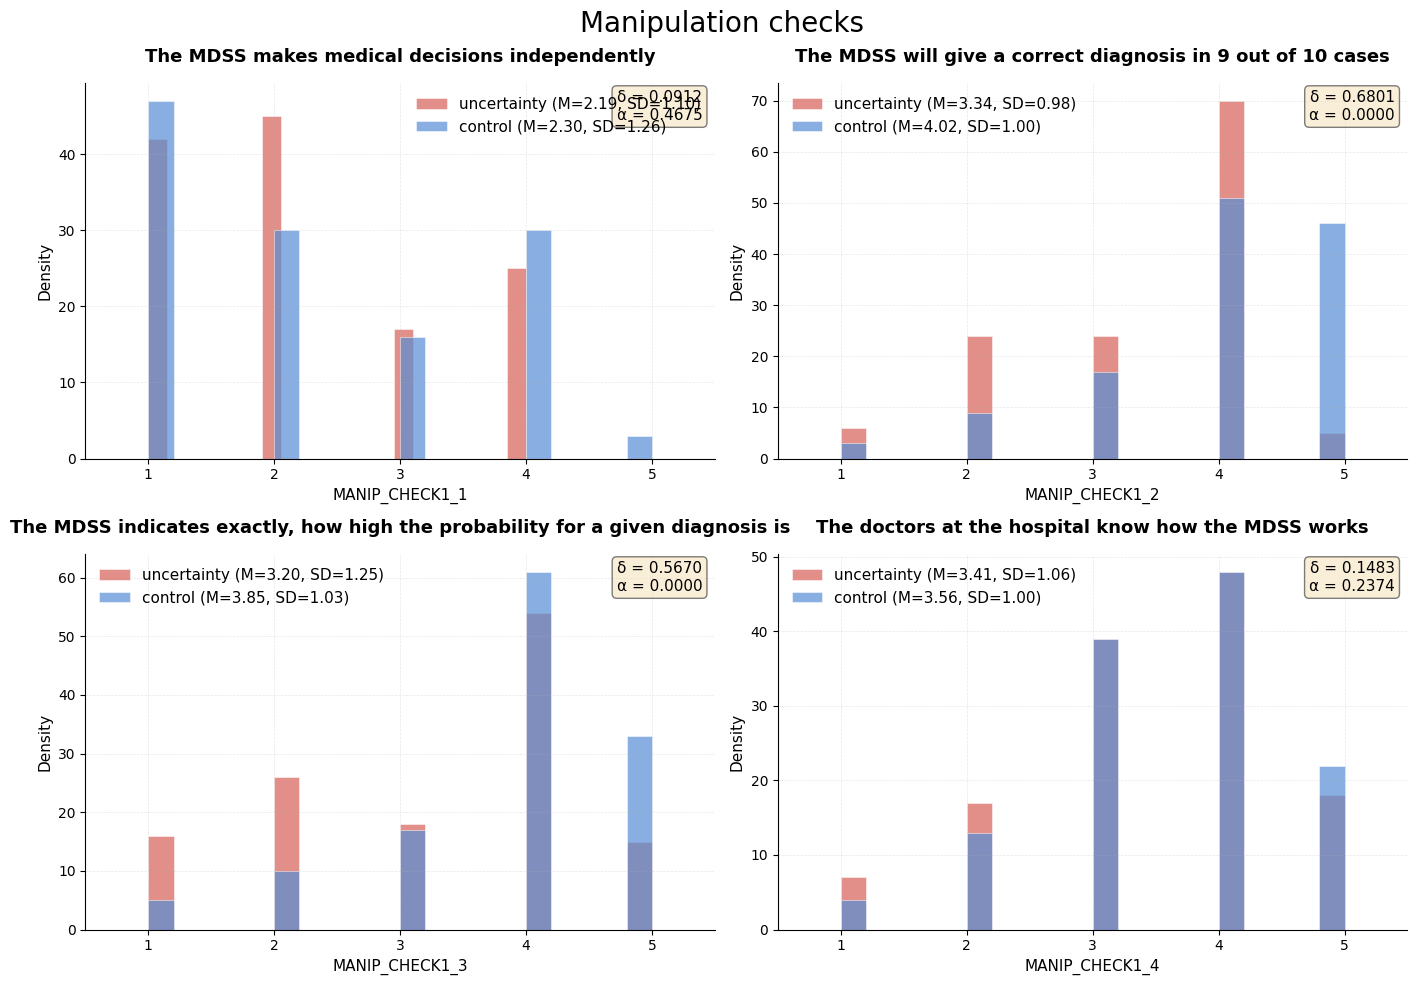

In [7]:
# Manipulation check
manip_check_scales = []
for i in range(4):
    manip_check_scales.append(f'manip_check1_{i+1}')

fig, axes = create_figure_grid(4, ncols=2, figsize=(14, 10))

for (i, scale) in enumerate(manip_check_scales):
    plot_likert_distribution(data, scale, title=get_question_statement(scale), group_by='stimulus_group', ax=axes[i],
                         show_bars=True, show_kde=False)

fig.suptitle("Manipulation checks", fontsize=20)

plt.tight_layout()
plt.show()

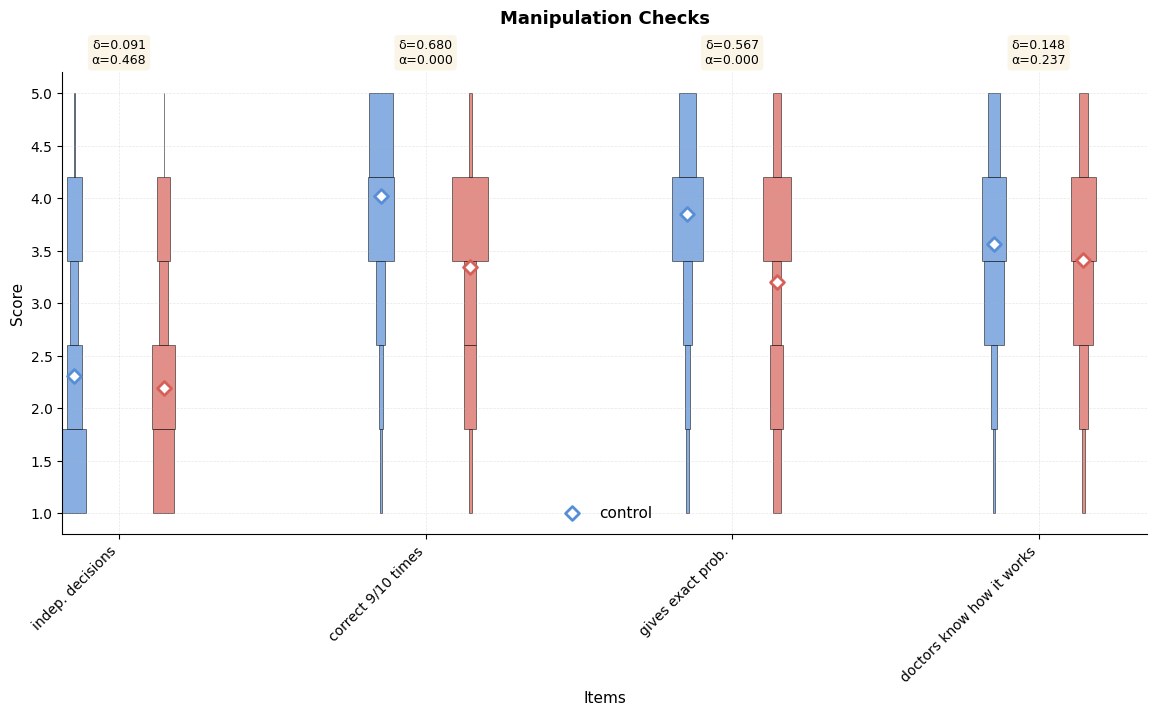

In [8]:
fig, ax = plt.subplots(figsize=(14, 6))
plot_boxplot(data, manip_check_scales,
             group_by='stimulus_group',
             title='Manipulation Checks',
             short_labels=['indep. decisions', 'correct 9/10 times', 'gives exact prob.', 'doctors know how it works'],
             ax=ax,
             mirror_hist=True, show_mean=True)
plt.show()

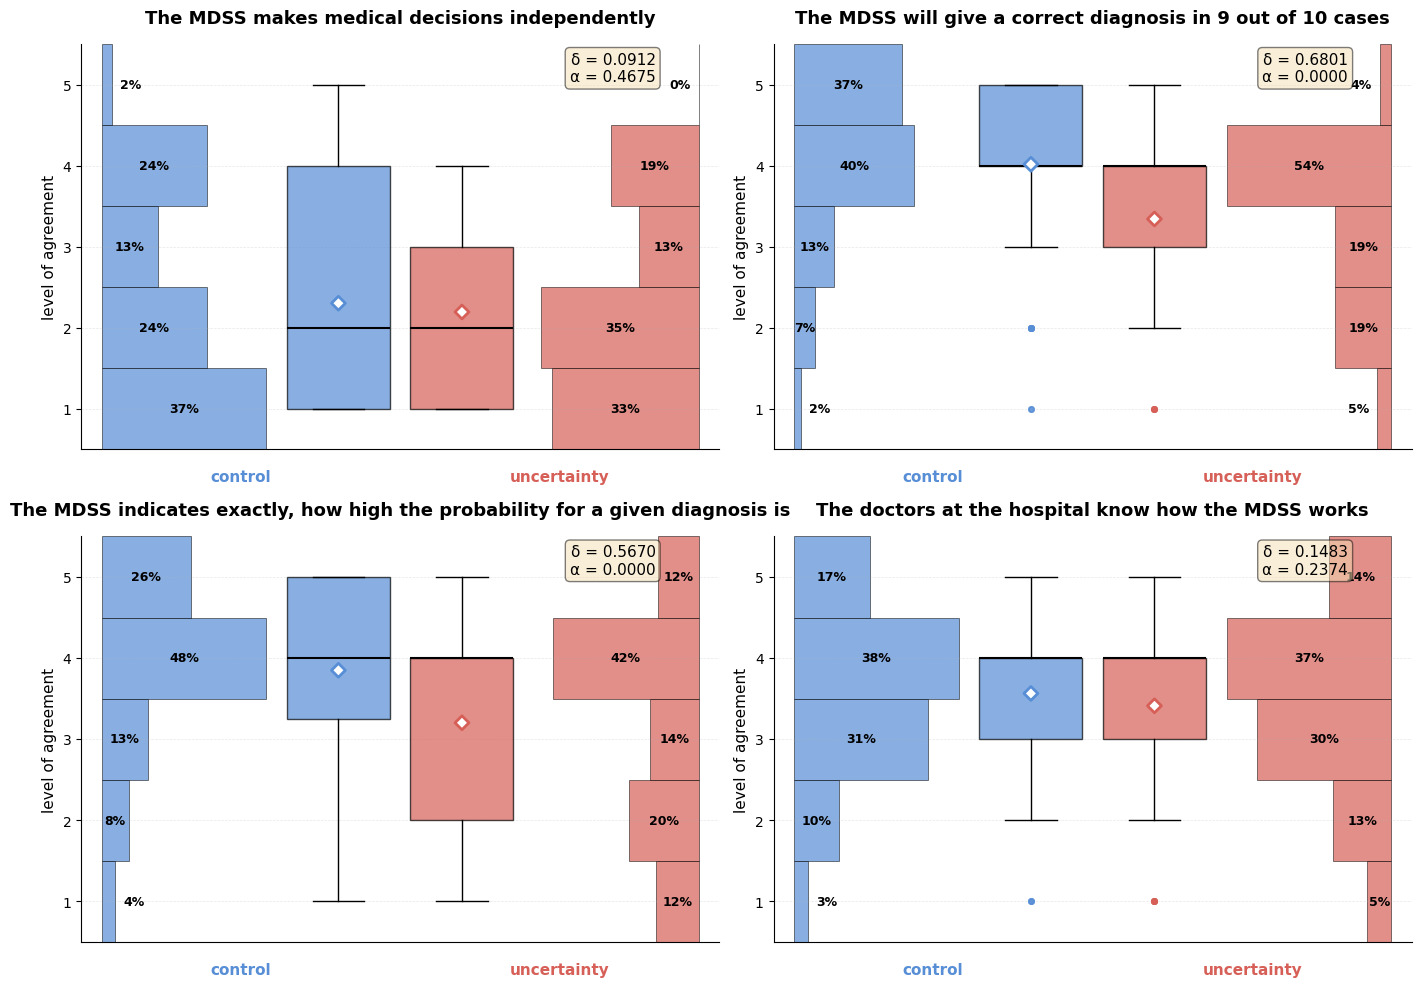

In [9]:
fig, axs = create_figure_grid(4, ncols=2, figsize=(14, 10))

for (i, scale) in enumerate(manip_check_scales):
    plot_split_histogram_boxplot(data, scale, group_by='stimulus_group',
                             title=get_question_statement(scale),
                             ylabel='level of agreement',
                             ax=axs[i])

plt.tight_layout()
plt.show()

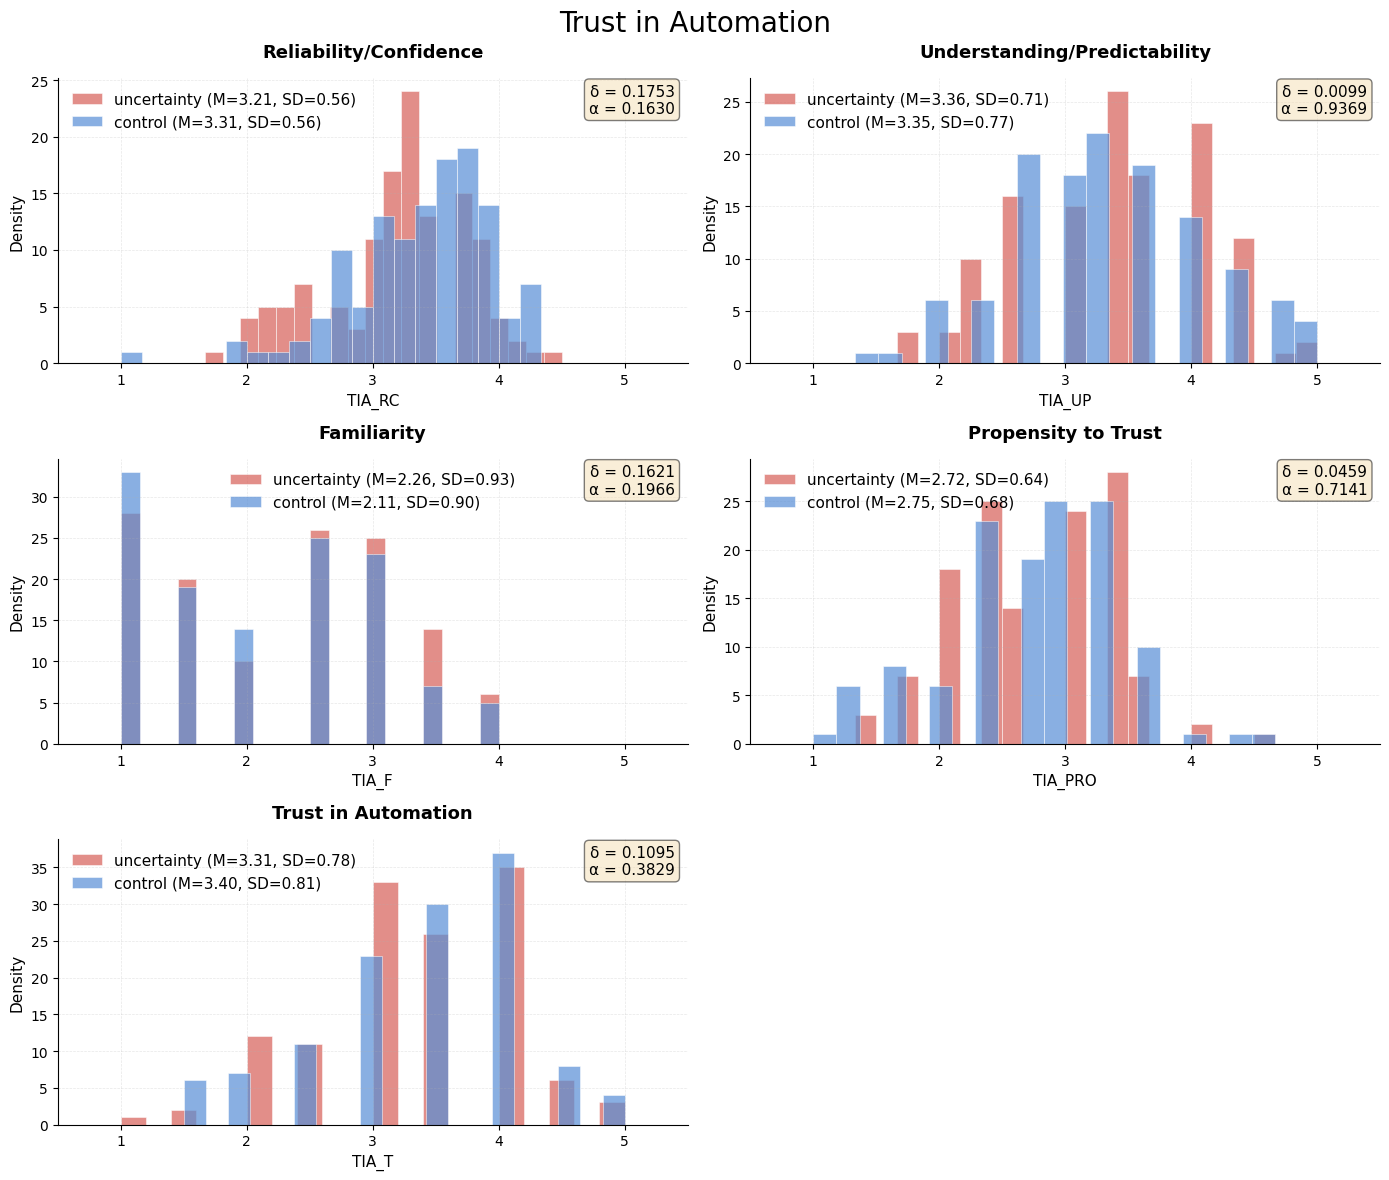

In [10]:
# Outcome variables
tia_scales = ['tia_rc', 'tia_up', 'tia_f', 'tia_pro', 'tia_t']
fig, axes = create_figure_grid(len(tia_scales), ncols=2, figsize=(14, 12))

for idx, scale in enumerate(tia_scales):
    plot_likert_distribution(data, scale, title=scale_titles.get(scale)[6:],
                           group_by='stimulus_group', ax=axes[idx], show_bars=True, show_kde=False)

fig.suptitle("Trust in Automation", fontsize=20)

plt.tight_layout()
plt.show()